### TEST DE POSITIONNEMENT SIMPLON : ANALYSE DES VENTES D’UNE PME FICHE SYNTHÈSE



In [42]:
# Run analyses on the results of the database 'database.db'

import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Path to the database file
DB_PATH = '/Users/LounesAbd/git/simplon_project/simplon_data_engineer_project/data/database.db'

# Connectionn SQLite
conn = sqlite3.connect(DB_PATH)
cur = conn.cursor()

# Fetch all data from the various tables to different DataFrames
def fetch_data(query):
    return pd.read_sql_query(query, conn)

# Queries to fetch data from the db
queries = {
    'ventes': 'SELECT * FROM ventes',
    'produits': 'SELECT * FROM produits',
    'magasins': 'SELECT * FROM magasins',
    'ventes_produit': 'SELECT * FROM ventes_produit',
    'ventes_region': 'SELECT * FROM ventes_region',
    'total_ca': 'SELECT * FROM total_ca'
}

# Fetch data into DataFrames
dataframes = {name: fetch_data(query) for name, query in queries.items()}

# Close the database connection
conn.close()

In [43]:
DB_PATH = '/Users/LounesAbd/git/simplon_project/simplon_data_engineer_project/data/database.db'

# Connectionn SQLite
conn = sqlite3.connect(DB_PATH)
cur = conn.cursor()

# Fetch all data from the various tables to different DataFrames
def fetch_data(query):
    return pd.read_sql_query(query, conn)

# Queries to fetch data from the db
queries = {
    'ventes': 'SELECT * FROM ventes',
    'produits': 'SELECT * FROM produits',
    'magasins': 'SELECT * FROM magasins',
    'ventes_produit': 'SELECT * FROM ventes_produit',
    'ventes_region': 'SELECT * FROM ventes_region',
    'total_ca': 'SELECT * FROM total_ca'
}

# Fetch data into DataFrames
dataframes = {name: fetch_data(query) for name, query in queries.items()}

# Close the database connection
conn.close()

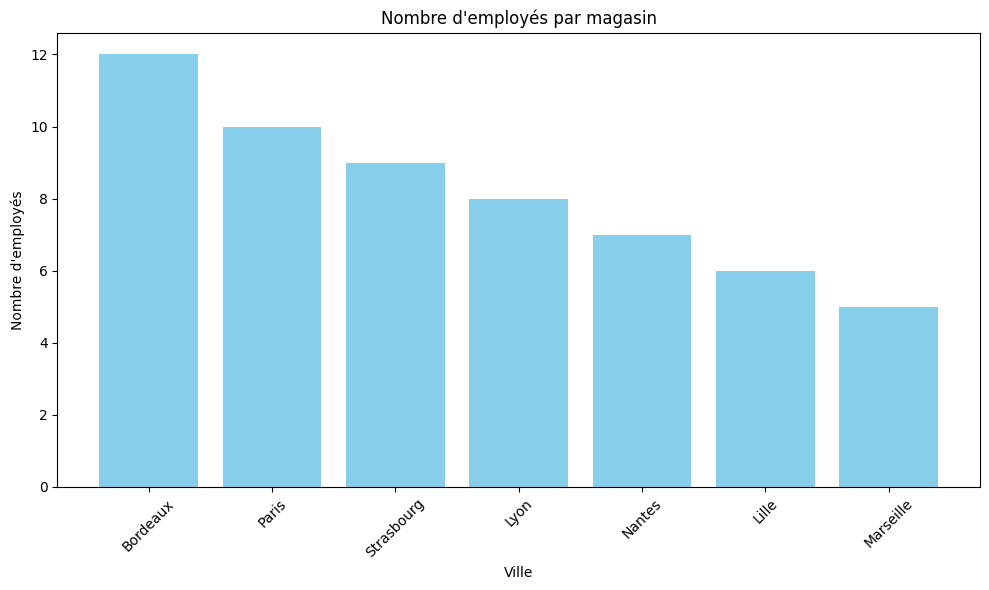

In [51]:
# Visualise the 'magasins' DataFrame. How many employees are there in each store?

magasins_df = dataframes['magasins'].sort_values('nb_salaries', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(magasins_df['ville'], magasins_df['nb_salaries'], color='skyblue')
plt.xlabel('Ville')
plt.ylabel('Nombre d\'employés')
plt.title('Nombre d\'employés par magasin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


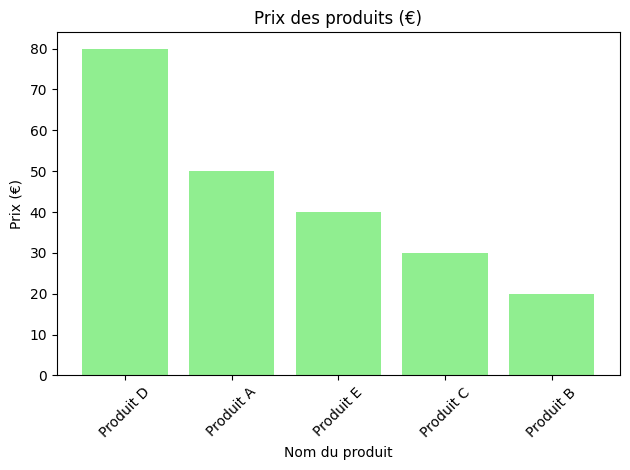

In [45]:
# Visualise the 'produits' DataFrame. What are the products and their prices ?

produits_df = dataframes['produits'].sort_values('prix', ascending=False)
plt.bar(produits_df['nom'], produits_df['prix'], color='lightgreen')
plt.xlabel('Nom du produit')
plt.ylabel('Prix (€)')
plt.title('Prix des produits (€)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


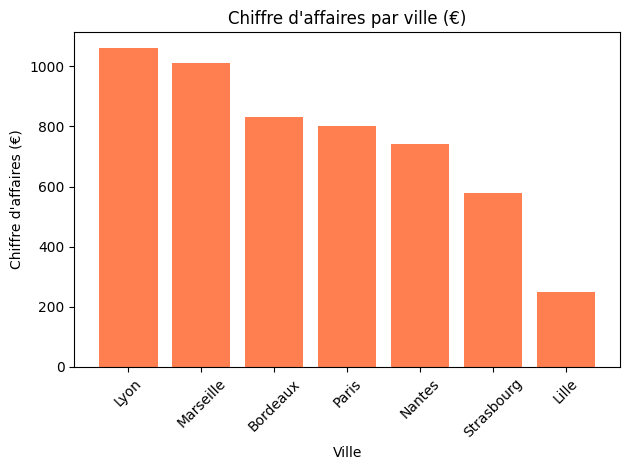

In [46]:
# Visualise the 'ventes_region' DataFrame with a scatter plot. What are the performances of each region in terms of sales?

ventes_region_df = dataframes['ventes_region'].sort_values('total_ca', ascending=False)
plt.bar(ventes_region_df['ville'], ventes_region_df['total_ca'], color='coral')
plt.xlabel('Ville')
plt.ylabel('Chiffre d\'affaires (€)')
plt.title('Chiffre d\'affaires par ville (€)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


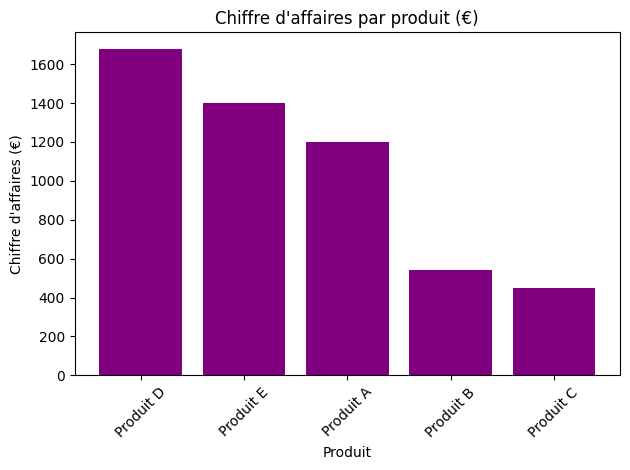

In [47]:
# Visualise the 'ventes_produit' DataFrame with a bar plot. What are the performances of each product in terms of sales?

ventes_produit_df = dataframes['ventes_produit'].sort_values('total_ca', ascending=False)
plt.bar(ventes_produit_df['nom_produit'], ventes_produit_df['total_ca'], color='purple')
plt.xlabel('Produit')
plt.ylabel('Chiffre d\'affaires (€)')
plt.title('Chiffre d\'affaires par produit (€)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



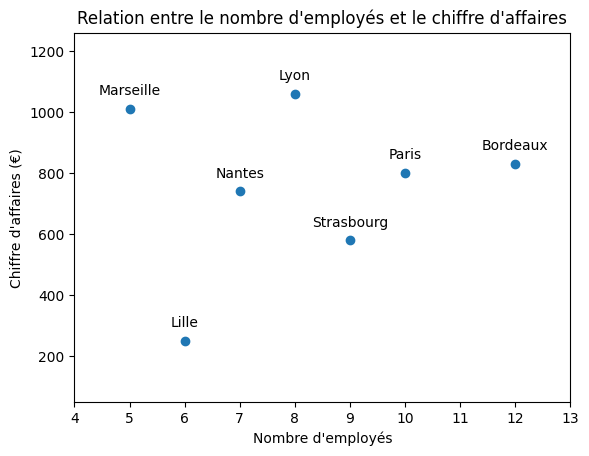

In [48]:
# Visualise the relationship between the number of employees in each store and the total sales in that store.
magasins_ventes_df = pd.merge(dataframes['magasins'], dataframes['ventes_region'], on='ville')
plt.scatter(magasins_ventes_df['nb_salaries'], magasins_ventes_df['total_ca'])
plt.xlabel('Nombre d\'employés')
plt.ylabel('Chiffre d\'affaires (€)')
plt.title('Relation entre le nombre d\'employés et le chiffre d\'affaires')

# Add annotations for each point to indicate the city
for i, row in magasins_ventes_df.iterrows():
    plt.annotate(row['ville'], (row['nb_salaries'], row['total_ca']),
                 textcoords="offset points", xytext=(0, 10), ha='center')

# Adjust size and limits of the plot
plt.xlim(magasins_ventes_df['nb_salaries'].min() - 1, magasins_ventes_df['nb_salaries'].max() + 1)
plt.ylim(magasins_ventes_df['total_ca'].min() - 200, magasins_ventes_df['total_ca'].max() + 200)

plt.show()
